In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [3]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

In [4]:
df = pd.read_csv('trump_insult_tweets_2014_to_2021.csv', index_col=0) 

In [4]:
df.head(5)

,date,target,insult,tweet
1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [5]:
df.loc[df['tweet'] == '.@KarlRove wasted $400 million + and didn’t win one race—a total loser. @FoxNews']

,date,target,insult,tweet
87,2015-07-16,karl-rove,wasted $400 million,.@KarlRove wasted $400 million + and didn’t wi...
88,2015-07-16,karl-rove,didn't win one race,.@KarlRove wasted $400 million + and didn’t wi...
89,2015-07-16,karl-rove,total loser,.@KarlRove wasted $400 million + and didn’t wi...


In [6]:
tweets = df.tweet.tolist()

In [7]:
len(tweets)

10360

In [8]:
tweets = list(set(tweets)) 

In [9]:
len(tweets)

5673

In [10]:
df.shape

(10360, 4)

In [11]:
df['target'].describe()

count         10358
unique          866
top       the-media
freq           1287
Name: target, dtype: object

In [12]:
df['insult'].describe()

count         10360
unique         6729
top       Fake News
freq            431
Name: insult, dtype: object

In [13]:
df['tweet'].describe()

count                                                 10360
unique                                                 5673
top       The Fake News Networks, those that knowingly h...
freq                                                     16
Name: tweet, dtype: object

In [14]:
ndf = df.drop_duplicates(subset=['tweet'])

<ipython-input-25-f3ae761e28f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['tweet_len'] = ndf['tweet'].apply(len)


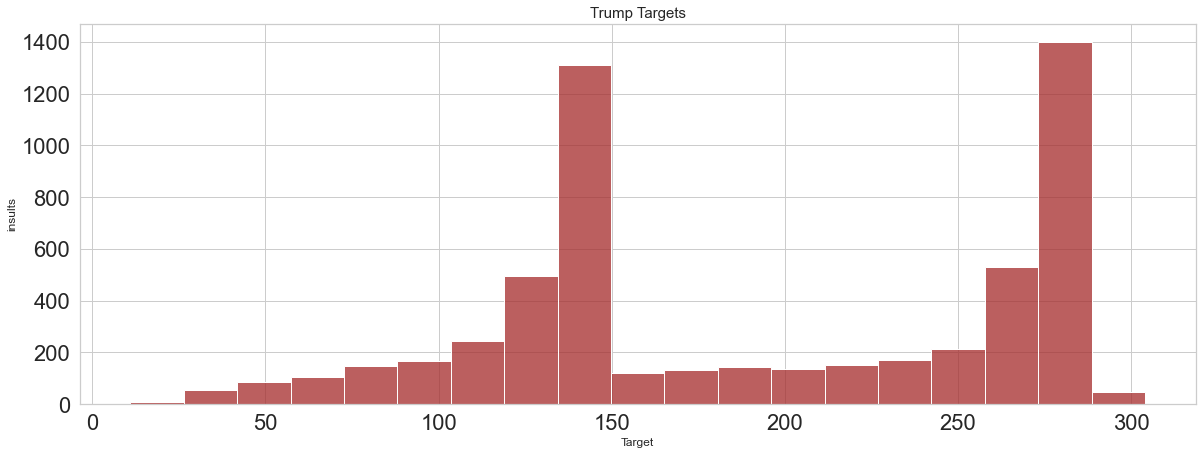

In [25]:
ndf['tweet_len'] = ndf['tweet'].apply(len)
plt.title('Trump Targets', fontsize=15);
plt.ylabel('insults', fontsize=12);
plt.xlabel('Target', fontsize=12);
tweet_len_vis = sns.histplot(ndf.tweet_len, color="brown")

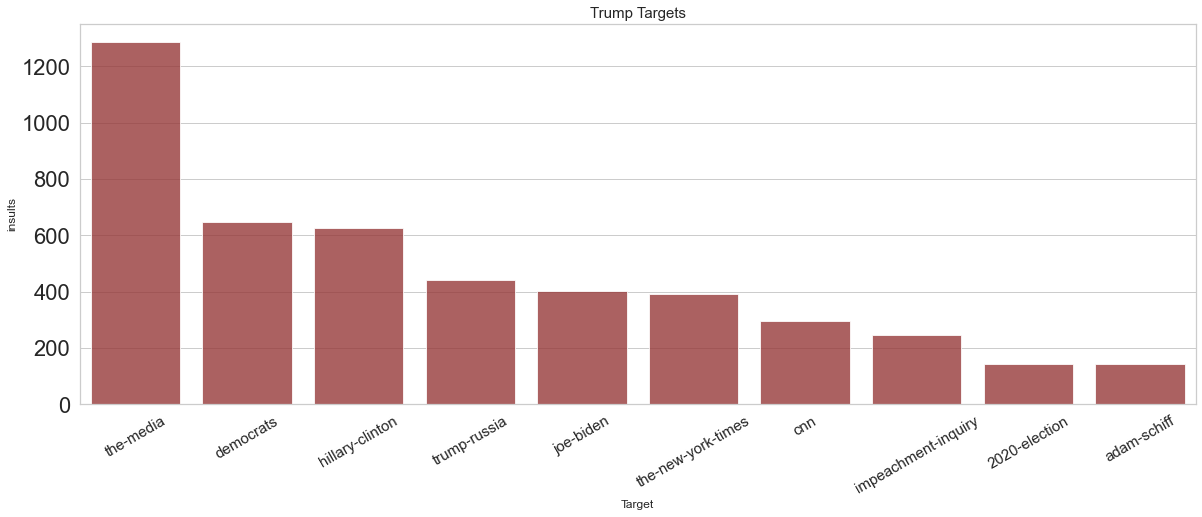

In [16]:
trump_targets =df['target'].value_counts()
trump_targets = trump_targets[:10]
trump_targets_vis = sns.barplot(x = trump_targets.index, y = trump_targets.values, alpha=0.8, color="brown")
plt.title('Trump Targets',fontsize=15);
plt.ylabel('insults', fontsize=12);
plt.xlabel('Target', fontsize=12);
trump_targets_vis.set_xticklabels(rotation=30, labels=trump_targets.index, fontsize=15);

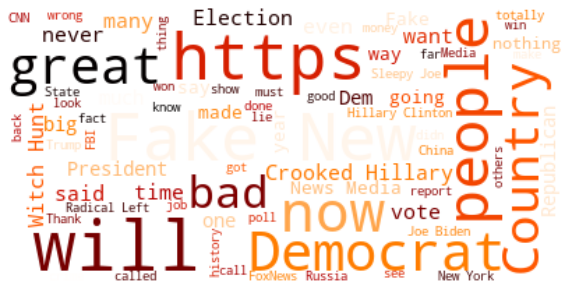

In [17]:
tweet_text = ' '.join(ndf['tweet'].tolist())
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, 
                      max_words=75, min_word_length = 3, colormap="gist_heat", 
                      background_color="white").generate(tweet_text)
plt.subplots(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
ndf["year"] = pd.DatetimeIndex(ndf["date"]).year

NameError: name 'ndf' is not defined

In [27]:
ndf['tweet_len'] = ndf['tweet'].apply(len)

<ipython-input-27-f9bee9b7e964>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['tweet_len'] = ndf['tweet'].apply(len)


In [27]:
ndf.groupby('year').sum('tweet_len')

NameError: name 'ndf' is not defined

In [39]:
year_df = ndf.groupby('year', as_index=False).agg({'tweet':'count'})

In [40]:
year_df

,year,tweet
0,2014,1
1,2015,492
2,2016,911
3,2017,608
4,2018,836
5,2019,1329
6,2020,1472
7,2021,24


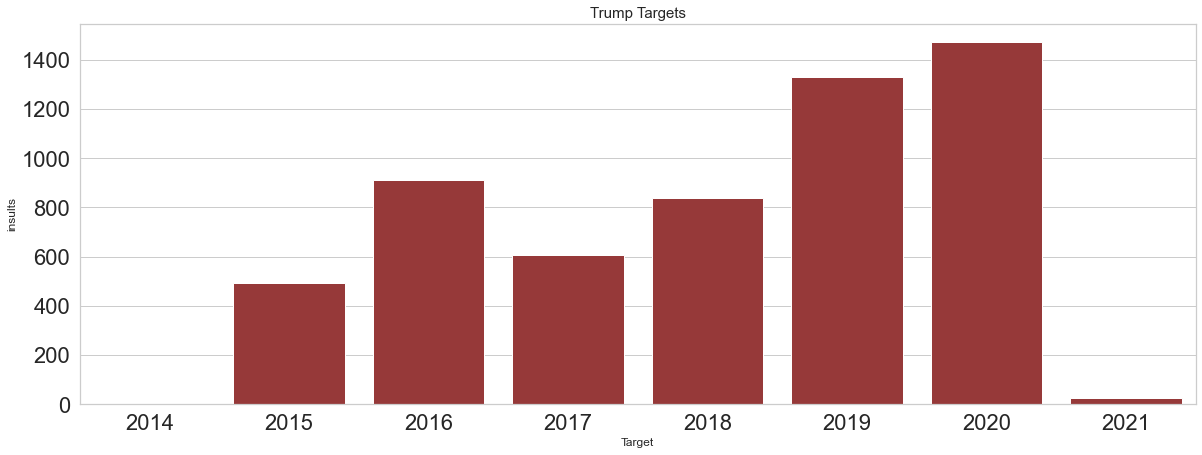

In [47]:
fig = sns.barplot(x = year_df.year, y = year_df.tweet, color="brown")
plt.title('Trump Targets', fontsize=15);
plt.ylabel('insults', fontsize=12);
plt.xlabel('Target', fontsize=12);

<AxesSubplot:xlabel='year', ylabel='tweet_len'>

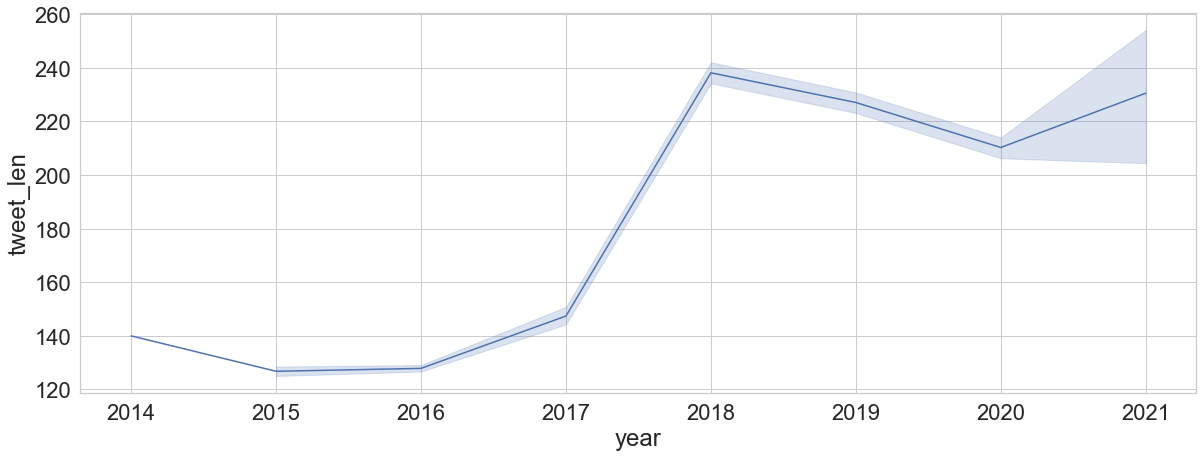

In [21]:
sns.lineplot(data=ndf, x="year", y="tweet_len")

In [29]:
df["year"] = pd.DatetimeIndex(df["date"]).year

In [30]:
target_by_year = df.groupby(['year', 'target'])['tweet'].agg('count')\
  .reset_index()\
  .sort_values(by = ['tweet', 'year'], ascending=False)

In [31]:
target_by_year.head(10)

,year,target,tweet
248,2016,hillary-clinton,422
955,2019,the-media,361
1244,2020,the-media,340
1117,2020,joe-biden,325
794,2019,democrats,281
702,2018,the-media,261
495,2017,the-media,240
713,2018,trump-russia,204
838,2019,impeachment-inquiry,167
1055,2020,democrats,150
